In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as ply

% matplotlib inline

df_global = pd.read_csv('data/global.csv', index_col='year')
df_local = pd.read_csv('data/local.csv', index_col='year')

In [52]:
# vars to define window of MA
shortWindow=2
longWindow=6

# prepare local dataset
df_local['avg_ma']=df_local['avg_temp'].rolling(window=shortWindow).mean()
df_local['avg_ma2']=df_local['avg_temp'].rolling(window=longWindow).mean()

# # prepare global dataset
df_global['avg_ma'] = df_global['avg_temp'].rolling(window=shortWindow).mean()
df_global['avg_ma2'] = df_global['avg_temp'].rolling(window=longWindow).mean()

In [53]:
df_global.head()

,avg_temp,avg_ma,avg_ma2
year,,,
1832,7.45,NaN,NaN
1833,8.01,7.730,NaN
1834,8.15,8.080,NaN
1835,7.39,7.770,NaN
1836,7.70,7.545,NaN


In [54]:
df_local.head()

,city,country,avg_temp,avg_ma,avg_ma2
year,,,,,
1832,Curitiba,Brazil,16.60,NaN,NaN
1833,Curitiba,Brazil,17.48,17.040,NaN
1834,Curitiba,Brazil,16.95,17.215,NaN
1835,Curitiba,Brazil,16.28,16.615,NaN
1836,Curitiba,Brazil,16.56,16.420,NaN


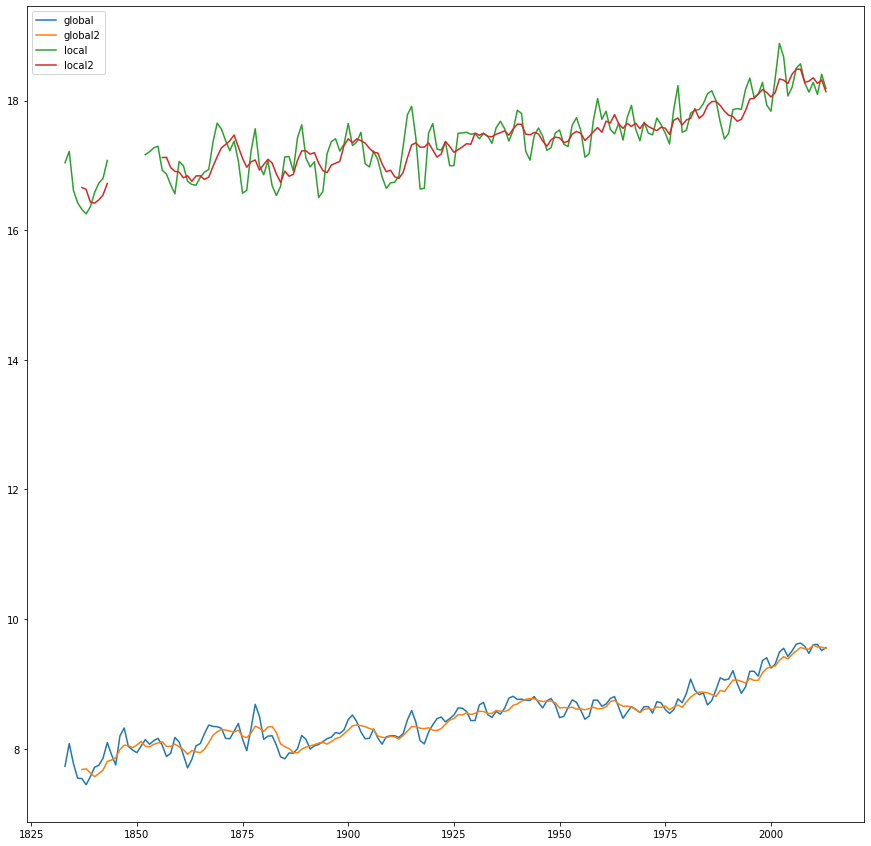

In [68]:
ply.figure(figsize=(15,15))
ply.plot(df_global['avg_ma'], label='global')
ply.plot(df_global['avg_ma2'], label='global2')
ply.plot(df_local['avg_ma'], label='local')
ply.plot(df_local['avg_ma2'], label='local2')
ply.legend(loc='upper left')
